# Conceitos Estatísticos para IA - 24IA

### Trabalho prático usando o Python

Habilidades desenvolvidas: Análise exploratória dos dados. Qualidade dos dados 

Profa. Regina Bernal

In [1]:
# Importar as bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
# Importar o dataset. Acrescentar o diretório do arquivo
df=pd.read_csv('cadastro.csv')

In [3]:
df.head()

,Unnamed: 0,NUM_CPF,CHAVE_CONTRATO,DATA_NASCIMENTO,RENDA_PRESUMIDA,CEP,LOGRADOURO,NUMERO,COMPLEMENTO,CEP_A,...,NUM_AGENCIA,NUM_CONTA,MARCA_VEICULO,MODELO_VEICULO,PLACA_VEICULO,CNPJ_CREDOR,VALOR_DIVIDA,STATUS_CONSENTIMENTO,DATA_INCLUSAO1,IDADE
0,1,40977545806,1,25/09/1996,1890000.00,2471020,R AUGUSTO VIANA DE CASTELO,26.0,NaN,2471020,...,NaN,NaN,NaN,NaN,NaN,3.774819e+12,220,1,2/26/2019 11:28:49,23.0
1,2,72544350725,2,10/03/1961,1333890.24,1319001,R MARIA PAULA,201.0,AP 52,1319001,...,6571.0,15044.0,FERRARI,355 SPIDER,AFZ6118,4.043254e+13,850,1,2/7/2001 0:00:00,40.0
2,3,10536099812,3,28/11/1965,22000.00,4323120,R DAS JOIAS,202.0,VL DO,4323120,...,7006.0,52946.0,NaN,NaN,NaN,6.169523e+13,142,1,8/23/2018 6:42:12,53.0
3,4,1471742873,4,02/05/1959,16000.00,4136030,R GUARAREMA,430.0,NaN,4136030,...,1850.0,1103486.0,NaN,NaN,NaN,NaN,0,1,NaN,NaN
4,5,954396332,5,10/11/1984,15929.00,8452105,R JOAO DE SIQUEIRA AFONSO,709.0,CAS,8452105,...,123.0,580882.0,NaN,NaN,NaN,3.510965e+13,400,1,11/24/2010 10:30:45,26.0


In [4]:
df.head(2).T

,0,1
Unnamed: 0,1,2
NUM_CPF,40977545806,72544350725
CHAVE_CONTRATO,1,2
DATA_NASCIMENTO,25/09/1996,10/03/1961
RENDA_PRESUMIDA,1890000.0,1333890.24
CEP,2471020,1319001
LOGRADOURO,R AUGUSTO VIANA DE CASTELO,R MARIA PAULA
NUMERO,26.0,201.0
COMPLEMENTO,NaN,AP 52
CEP_A,2471020,1319001


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            426 non-null    int64  
 1   NUM_CPF               426 non-null    int64  
 2   CHAVE_CONTRATO        426 non-null    int64  
 3   DATA_NASCIMENTO       426 non-null    object 
 4   RENDA_PRESUMIDA       426 non-null    float64
 5   CEP                   426 non-null    int64  
 6   LOGRADOURO            426 non-null    object 
 7   NUMERO                425 non-null    float64
 8   COMPLEMENTO           206 non-null    object 
 9   CEP_A                 426 non-null    int64  
 10  BAIRRO                390 non-null    object 
 11  CIDADE                426 non-null    object 
 12  UF                    426 non-null    object 
 13  LATITUDE              389 non-null    float64
 14  LONGITUDE             389 non-null    float64
 15  DDD_CELULAR           2

In [6]:
df.describe().round(2)

,Unnamed: 0,NUM_CPF,CHAVE_CONTRATO,RENDA_PRESUMIDA,CEP,NUMERO,CEP_A,LATITUDE,LONGITUDE,DDD_CELULAR,CELULAR,DDD_CELULAR_2,CELULAR_2,COD_BANCO,NUM_AGENCIA,NUM_CONTA,CNPJ_CREDOR,VALOR_DIVIDA,STATUS_CONSENTIMENTO,IDADE
count,426.00,4.260000e+02,426.00,426.00,426.00,425.00,426.00,389.00,389.00,275.00,2.750000e+02,170.00,1.700000e+02,308.00,308.00,3.080000e+02,4.210000e+02,426.00,426.0,421.00
mean,213.50,2.683050e+10,213.50,10387.81,4635212.33,595.29,4635212.33,-23.58,-46.60,16.50,9.767366e+08,18.26,9.603911e+08,189.76,2570.55,5.186252e+07,3.187376e+13,212868.56,1.0,45.74
std,123.12,1.913585e+10,123.12,111783.91,1978839.32,4869.60,1978839.32,0.08,0.11,17.78,5.632365e+07,19.58,1.381628e+08,175.78,2347.82,4.690165e+08,2.228397e+13,2202077.89,0.0,107.73
min,1.00,9.470051e+07,1.00,0.00,1007020.00,3.00,1007020.00,-23.80,-46.81,11.00,7.846212e+07,11.00,7.715194e+07,1.00,1.00,2.900000e+02,1.134510e+11,0.00,1.0,17.00
25%,107.25,1.086907e+10,107.25,2068.50,3153250.25,58.00,3153250.25,-23.63,-46.68,11.00,9.695551e+08,11.00,9.735050e+08,33.00,563.25,1.503000e+04,8.623036e+12,198.50,1.0,30.00
50%,213.50,2.604114e+10,213.50,2431.58,4323120.00,164.00,4323120.00,-23.56,-46.63,11.00,9.824974e+08,11.00,9.822677e+08,237.00,1900.00,5.395100e+04,4.043254e+13,360.00,1.0,37.00
75%,319.75,3.579893e+10,319.75,2923.54,5644782.50,430.00,5644782.50,-23.51,-46.52,11.00,9.924245e+08,11.00,9.934956e+08,341.00,3781.00,4.884892e+05,4.337477e+13,981.00,1.0,46.00
max,426.00,9.992102e+10,426.00,1890000.00,8490018.00,99999.00,8490018.00,-23.43,-46.38,98.00,9.999940e+08,98.00,9.998896e+08,756.00,9270.00,6.500059e+09,9.636731e+13,28072009.00,1.0,2006.00


In [7]:
## Preprocessing
# mudar o formato da variável number para string
df['NUM_CPF'] = df['NUM_CPF'].astype(str)
df['CHAVE_CONTRATO'] = df['CHAVE_CONTRATO'].astype(str)
df['CEP'] = df['CEP'].astype(str)
df['CEP_A'] = df['CEP_A'].astype(str)
df['NUMERO'] = df['NUMERO'].astype(str)
df['LATITUDE'] = df['LATITUDE'].astype(str)
df['LONGITUDE'] = df['LONGITUDE'].astype(str)
df['CELULAR'] = df['CELULAR'].astype(str)
df['DDD_CELULAR'] = df['DDD_CELULAR'].astype(str)
df['CELULAR_2'] = df['CELULAR_2'].astype(str)
df['DDD_CELULAR_2'] = df['DDD_CELULAR_2'].astype(str)
df['COD_BANCO'] = df['COD_BANCO'].astype(str)               
df['NUM_AGENCIA'] = df['NUM_AGENCIA'].astype(str)          
df['NUM_CONTA'] = df['NUM_CONTA'].astype(str)        
df['CNPJ_CREDOR'] = df['CNPJ_CREDOR'].astype(str)        
df['STATUS_CONSENTIMENTO'] = df['STATUS_CONSENTIMENTO'].astype(str)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            426 non-null    int64  
 1   NUM_CPF               426 non-null    object 
 2   CHAVE_CONTRATO        426 non-null    object 
 3   DATA_NASCIMENTO       426 non-null    object 
 4   RENDA_PRESUMIDA       426 non-null    float64
 5   CEP                   426 non-null    object 
 6   LOGRADOURO            426 non-null    object 
 7   NUMERO                426 non-null    object 
 8   COMPLEMENTO           206 non-null    object 
 9   CEP_A                 426 non-null    object 
 10  BAIRRO                390 non-null    object 
 11  CIDADE                426 non-null    object 
 12  UF                    426 non-null    object 
 13  LATITUDE              426 non-null    object 
 14  LONGITUDE             426 non-null    object 
 15  DDD_CELULAR           4

In [9]:
df.head(2).T

,0,1
Unnamed: 0,1,2
NUM_CPF,40977545806,72544350725
CHAVE_CONTRATO,1,2
DATA_NASCIMENTO,25/09/1996,10/03/1961
RENDA_PRESUMIDA,1890000.0,1333890.24
CEP,2471020,1319001
LOGRADOURO,R AUGUSTO VIANA DE CASTELO,R MARIA PAULA
NUMERO,26.0,201.0
COMPLEMENTO,NaN,AP 52
CEP_A,2471020,1319001


In [10]:
df.describe().round(2)

,Unnamed: 0,RENDA_PRESUMIDA,VALOR_DIVIDA,IDADE
count,426.00,426.00,426.00,421.00
mean,213.50,10387.81,212868.56,45.74
std,123.12,111783.91,2202077.89,107.73
min,1.00,0.00,0.00,17.00
25%,107.25,2068.50,198.50,30.00
50%,213.50,2431.58,360.00,37.00
75%,319.75,2923.54,981.00,46.00
max,426.00,1890000.00,28072009.00,2006.00


In [11]:
# Quando o muda o formato da variável numérica para string, o missing (NaN) altera para nan. É necessário mudar o nan para NaN.
df.replace('nan', np.NaN, inplace=True)

In [12]:
df.head(2).T

,0,1
Unnamed: 0,1,2
NUM_CPF,40977545806,72544350725
CHAVE_CONTRATO,1,2
DATA_NASCIMENTO,25/09/1996,10/03/1961
RENDA_PRESUMIDA,1890000.0,1333890.24
CEP,2471020,1319001
LOGRADOURO,R AUGUSTO VIANA DE CASTELO,R MARIA PAULA
NUMERO,26.0,201.0
COMPLEMENTO,NaN,AP 52
CEP_A,2471020,1319001


### Exploratory Data Analysis (EDA)

In [13]:
Describe = df.describe() 

In [14]:
Describe = Describe.T

In [15]:
# Cálculo do coeficiente de variação (CV). Variáveis com CV > 0.30 indicam presença de valores outliers.
Describe['CV'] = df.std()/df.mean() 

C:\Users\diego\AppData\Local\Temp\ipykernel_9552\3196567995.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Describe['CV'] = df.std()/df.mean()


In [16]:
Describe.round(2) 

,count,mean,std,min,25%,50%,75%,max,CV
Unnamed: 0,426.0,213.50,123.12,1.0,107.25,213.50,319.75,426.0,0.58
RENDA_PRESUMIDA,426.0,10387.81,111783.91,0.0,2068.50,2431.58,2923.54,1890000.0,10.76
VALOR_DIVIDA,426.0,212868.56,2202077.89,0.0,198.50,360.00,981.00,28072009.0,10.34
IDADE,421.0,45.74,107.73,17.0,30.00,37.00,46.00,2006.0,2.36


### Análise de detecção de outliers usando o Box Plot

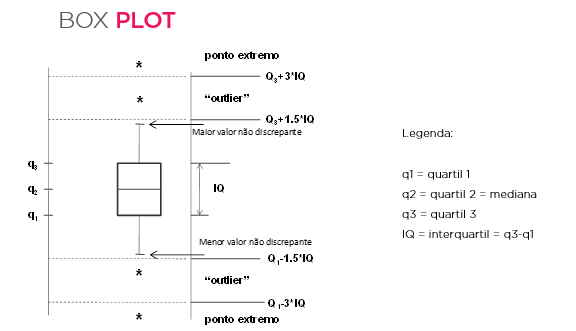

### Medidas resumo da variável Renda presumida

### Quantos outliers? Quantos pontos extremos?

In [17]:
################################################
########### ALGORITMO DO BOX PLOT   ############
################################################


print('Quartil 1 (Q1) = ',np.percentile(df['RENDA_PRESUMIDA'], 25))

print('Quartil 2 (Q2) = Mediana = ', np.percentile(df['RENDA_PRESUMIDA'], 50))

print('Quartil 3 (Q3) = ',np.percentile(df['RENDA_PRESUMIDA'], 75))

print('Inter-quartil (IQ) = Q3 - Q1 = ',(np.percentile(df['RENDA_PRESUMIDA'], 75) - np.percentile(df['RENDA_PRESUMIDA'], 25)))

print('Limite 1 = Q3 + 3 * IQ = ',(np.percentile(df['RENDA_PRESUMIDA'], 75) + 3 * (np.percentile(df['RENDA_PRESUMIDA'], 75) - np.percentile(df['RENDA_PRESUMIDA'], 25))))

print('Limite 2 = Q3 + 1.5 * IQ = ',(np.percentile(df['RENDA_PRESUMIDA'], 75) + 1.5 * (np.percentile(df['RENDA_PRESUMIDA'], 75) - np.percentile(df['RENDA_PRESUMIDA'], 25))))

print('Limite 3 = Q1 - 1.5 * IQ = ',(np.percentile(df['RENDA_PRESUMIDA'], 25) - 1.5 * (np.percentile(df['RENDA_PRESUMIDA'], 75) - np.percentile(df['RENDA_PRESUMIDA'], 25))))

print('Limite 4 = Q1 - 3 * IQ = ',(np.percentile(df['RENDA_PRESUMIDA'], 25) - 3 * (np.percentile(df['RENDA_PRESUMIDA'], 75) - np.percentile(df['RENDA_PRESUMIDA'], 25))))
  
limite1 = (np.percentile(df['RENDA_PRESUMIDA'], 75) + 3 * (np.percentile(df['RENDA_PRESUMIDA'], 75) - np.percentile(df['RENDA_PRESUMIDA'], 25)))
limite2 = (np.percentile(df['RENDA_PRESUMIDA'], 75) + 1.5 * (np.percentile(df['RENDA_PRESUMIDA'], 75) - np.percentile(df['RENDA_PRESUMIDA'], 25)))
limite3 = (np.percentile(df['RENDA_PRESUMIDA'], 25) - 1.5 * (np.percentile(df['RENDA_PRESUMIDA'], 75) - np.percentile(df['RENDA_PRESUMIDA'], 25)))
limite4 = (np.percentile(df['RENDA_PRESUMIDA'], 25) - 3 * (np.percentile(df['RENDA_PRESUMIDA'], 75) - np.percentile(df['RENDA_PRESUMIDA'], 25)))


Quartil 1 (Q1) =  2068.5
Quartil 2 (Q2) = Mediana =  2431.58
Quartil 3 (Q3) =  2923.545
Inter-quartil (IQ) = Q3 - Q1 =  855.0450000000001
Limite 1 = Q3 + 3 * IQ =  5488.68
Limite 2 = Q3 + 1.5 * IQ =  4206.1125
Limite 3 = Q1 - 1.5 * IQ =  785.9324999999999
Limite 4 = Q1 - 3 * IQ =  -496.6350000000002


In [18]:
print('Outliers Inferior: ', df.loc[(df.RENDA_PRESUMIDA >= limite2) & (df.RENDA_PRESUMIDA <= limite1), 'RENDA_PRESUMIDA'].count())
print('Outliers Superior: ', df.loc[(df.RENDA_PRESUMIDA >= limite4) & (df.RENDA_PRESUMIDA <= limite3), 'RENDA_PRESUMIDA'].count())
print('Pontos Extremos: ', df.loc[(df.RENDA_PRESUMIDA >= limite1) | (df.RENDA_PRESUMIDA <= limite4), 'RENDA_PRESUMIDA'].count())


Outliers Inferior:  20
Outliers Superior:  18
Pontos Extremos:  20


<AxesSubplot:ylabel='RENDA_PRESUMIDA'>

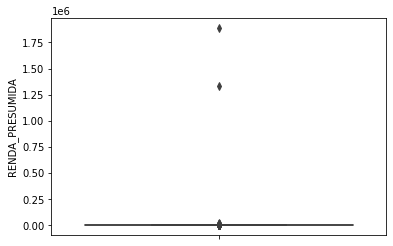

In [19]:
# Box Plot da base completa
sns.boxplot(y="RENDA_PRESUMIDA", data=df)

In [20]:
df.loc[(df.RENDA_PRESUMIDA >= limite2) & (df.RENDA_PRESUMIDA <= limite1), 'Renda_Outlier'] = 1.0
df.loc[(df.RENDA_PRESUMIDA >= limite4) & (df.RENDA_PRESUMIDA <= limite3), 'Renda_Outlier'] = 1.0
df.loc[(df.RENDA_PRESUMIDA >= limite1) | (df.RENDA_PRESUMIDA <= limite4), 'Renda_Outlier'] = 2.0
df.loc[(df.RENDA_PRESUMIDA < limite2) & (df.RENDA_PRESUMIDA > limite3), 'Renda_Outlier'] = 0.0

In [21]:
df.head()

,Unnamed: 0,NUM_CPF,CHAVE_CONTRATO,DATA_NASCIMENTO,RENDA_PRESUMIDA,CEP,LOGRADOURO,NUMERO,COMPLEMENTO,CEP_A,...,NUM_CONTA,MARCA_VEICULO,MODELO_VEICULO,PLACA_VEICULO,CNPJ_CREDOR,VALOR_DIVIDA,STATUS_CONSENTIMENTO,DATA_INCLUSAO1,IDADE,Renda_Outlier
0,1,40977545806,1,25/09/1996,1890000.00,2471020,R AUGUSTO VIANA DE CASTELO,26.0,NaN,2471020,...,NaN,NaN,NaN,NaN,3774819001508.0,220,1,2/26/2019 11:28:49,23.0,2.0
1,2,72544350725,2,10/03/1961,1333890.24,1319001,R MARIA PAULA,201.0,AP 52,1319001,...,15044.0,FERRARI,355 SPIDER,AFZ6118,40432544000147.0,850,1,2/7/2001 0:00:00,40.0,2.0
2,3,10536099812,3,28/11/1965,22000.00,4323120,R DAS JOIAS,202.0,VL DO,4323120,...,52946.0,NaN,NaN,NaN,61695227000193.0,142,1,8/23/2018 6:42:12,53.0,2.0
3,4,1471742873,4,02/05/1959,16000.00,4136030,R GUARAREMA,430.0,NaN,4136030,...,1103486.0,NaN,NaN,NaN,NaN,0,1,NaN,NaN,2.0
4,5,954396332,5,10/11/1984,15929.00,8452105,R JOAO DE SIQUEIRA AFONSO,709.0,CAS,8452105,...,580882.0,NaN,NaN,NaN,35109651000107.0,400,1,11/24/2010 10:30:45,26.0,2.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            426 non-null    int64  
 1   NUM_CPF               426 non-null    object 
 2   CHAVE_CONTRATO        426 non-null    object 
 3   DATA_NASCIMENTO       426 non-null    object 
 4   RENDA_PRESUMIDA       426 non-null    float64
 5   CEP                   426 non-null    object 
 6   LOGRADOURO            426 non-null    object 
 7   NUMERO                425 non-null    object 
 8   COMPLEMENTO           206 non-null    object 
 9   CEP_A                 426 non-null    object 
 10  BAIRRO                390 non-null    object 
 11  CIDADE                426 non-null    object 
 12  UF                    426 non-null    object 
 13  LATITUDE              389 non-null    object 
 14  LONGITUDE             389 non-null    object 
 15  DDD_CELULAR           2

In [23]:
import statistics 

### Calcular a média recortada (sem os outliers e pontos extremos)

In [24]:
################################################
########### REMOVER OS OUTLIERS ############
################################################

# Removendo os Outliers
dfSemOutlier = df.loc[df.Renda_Outlier == 0.0]

print('Mínimo = ', min(dfSemOutlier['RENDA_PRESUMIDA']))

print('Máximo = ', max(dfSemOutlier['RENDA_PRESUMIDA']))

print('Média = ', statistics.mean(dfSemOutlier['RENDA_PRESUMIDA']))

print('STD = ', dfSemOutlier['RENDA_PRESUMIDA'].std())

print('Coeficiente de Variação = ', (dfSemOutlier['RENDA_PRESUMIDA'].std() / dfSemOutlier['RENDA_PRESUMIDA'].mean()))


Mínimo =  1825.32
Máximo =  4200.0
Média =  2489.8616304347825
STD =  517.4251707755456
Coeficiente de Variação =  0.20781282158446374
